In [ ]:
!pip install statsmodels==0.12.2

     |████████████████████████████████| 9.5 MB 8.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install kats

     |████████████████████████████████| 6.3 MB 27.0 MB/s 
     |████████████████████████████████| 934 kB 51.7 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 310 kB 58.9 MB/s 
     |████████████████████████████████| 3.3 MB 42.3 MB/s 
     |████████████████████████████████| 34.5 MB 2.6 MB/s 
     |████████████████████████████████| 325 kB 4.9 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286608 sha256=93da1c13aa3a692d2ead10b1d3c2c858638727c315c234dd694a14676403f73f
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=6637010 sha256=6ebef3c23c401d4113060c245df20193349e49ebf328bbce7e39caa25a08dfe6
  Stored in directory: /root/.cache/pip/wheels/82/e8/a8/53f37f0a409bc51f8693e967dcce8f88bfd33632b40a594a28
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=

In [ ]:
!pip install sktime

     |████████████████████████████████| 6.5 MB 20.2 MB/s 


In [ ]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kats.consts import TimeSeriesData
from statsmodels.tsa.seasonal import STL
from kats.utils.simulator import Simulator
from sklearn.preprocessing import StandardScaler
from kats.tsfeatures.tsfeatures import TsFeatures
from sklearn.manifold import TSNE
import time
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore')

In [ ]:
from sktime.datasets import load_basic_motions

In [ ]:
X, y = load_basic_motions(split=None, return_X_y=True)

In [ ]:
from sktime.datatypes._panel._convert import from_nested_to_3d_numpy
from sktime.datatypes._panel._convert import from_nested_to_2d_array

In [ ]:
X_2d = from_nested_to_2d_array(X)
X_3d = from_nested_to_3d_numpy(X)
scaler = StandardScaler()
X_2dlist = scaler.fit_transform(X_2d)

In [ ]:
X_3d.shape

(80, 6, 100)

Standing


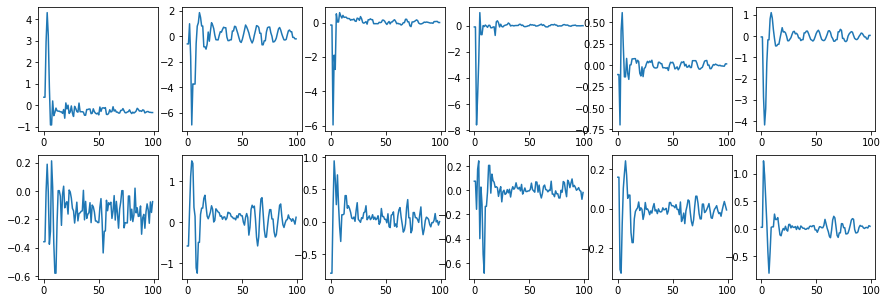

Running


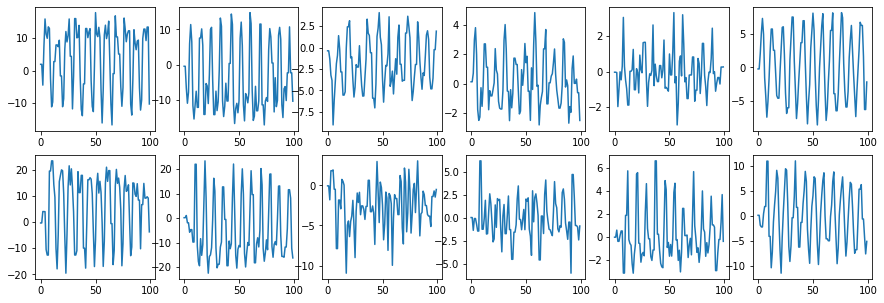

Badminton


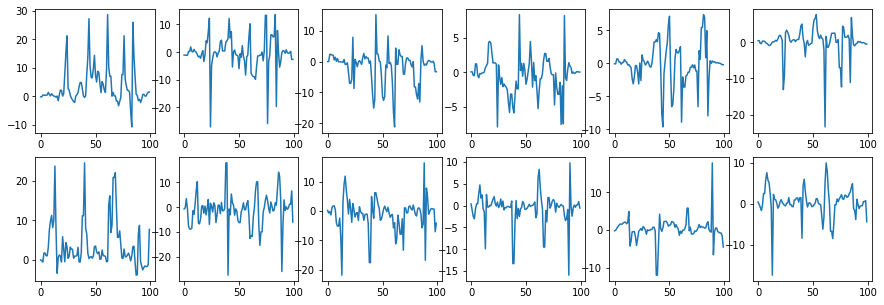

Walking


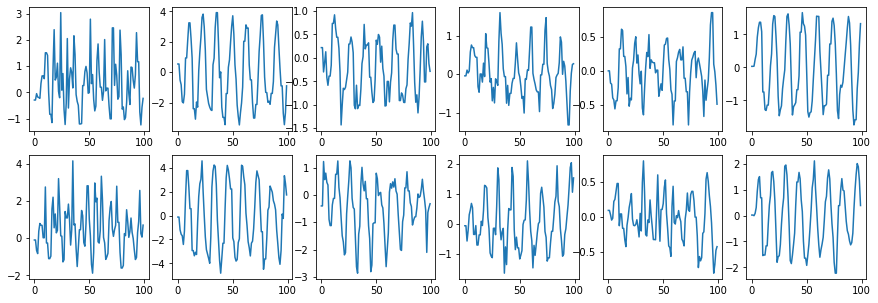

In [ ]:
x=[[1, 5], [11, 15], [72, 77], [60, 66]]

for a in range(4):
    print(y[x[a][0]])
    figure, axis = plt.subplots(2, 6, figsize=(15,5))
    for i in range(2):
        for j in range(6):
            axis[i,j].plot(X_3d[x[a][i]][j])
    plt.show()

In [ ]:
list_output = []
for ts in X_2dlist:
  temp = ts.copy()
  temp = pd.DataFrame(temp)
  temp.columns = ['value']
  model = TsFeatures()
  output_feature = model.transform(temp)
  #print(output_feature)
  list_output.append(output_feature)

In [ ]:
df_features = pd.DataFrame(list_output) # converting to dataframe
df_features['Dataset'] = 'Basic Motions'
df_features.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma,Dataset
0,600,0.045793,0.096271,0.638338,0.002380,0.053118,1,0.047007,0.134990,106,...,0.417080,0.206065,6,88,0.935452,1.587357e-12,NaN,NaN,NaN,Basic Motions
1,600,-0.011976,0.164300,0.797443,0.060625,0.056302,1,0.053447,0.203576,101,...,0.231711,0.087312,6,73,0.937234,0.000000e+00,NaN,NaN,NaN,Basic Motions
2,600,0.044466,0.097792,0.602372,0.000811,0.059037,1,0.032809,0.127373,110,...,0.426003,0.211112,6,91,1.000000,4.424669e-13,NaN,NaN,NaN,Basic Motions
3,600,0.030277,0.078678,0.607611,0.000457,0.049493,1,0.057524,0.113874,119,...,0.559225,0.257566,5,88,0.906036,1.330326e-13,NaN,NaN,NaN,Basic Motions
4,600,0.022441,0.072177,0.536830,0.000110,0.051343,1,0.075572,0.095869,106,...,0.642463,0.223286,5,87,0.979956,8.025037e-13,NaN,NaN,NaN,Basic Motions


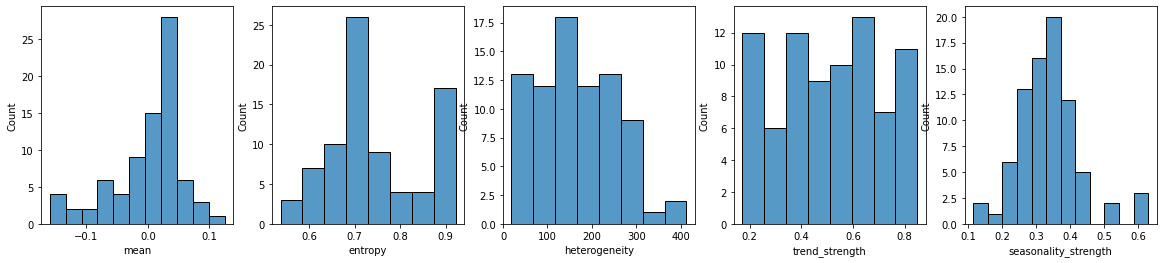

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features, x="mean", ax=ax[0])
sns.histplot(data=df_features, x="entropy", ax=ax[1])
sns.histplot(data=df_features, x="heterogeneity", ax=ax[2])
sns.histplot(data=df_features, x="trend_strength", ax=ax[3])
sns.histplot(data=df_features, x="seasonality_strength", ax=ax[4])
fig.show()



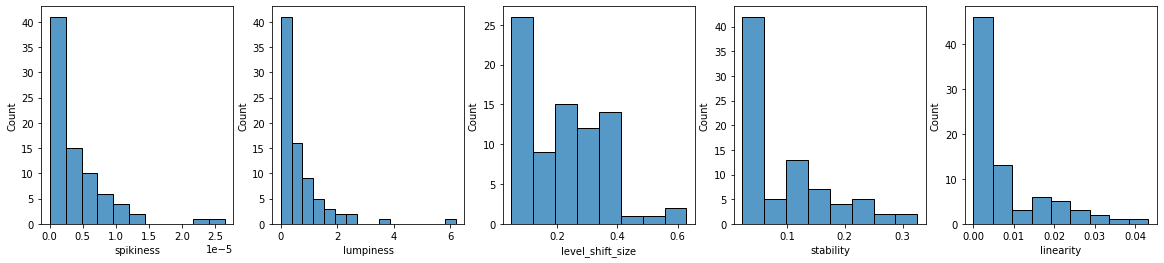

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features, x="spikiness", ax=ax[0])
sns.histplot(data=df_features, x="lumpiness", ax=ax[1])
sns.histplot(data=df_features, x="level_shift_size", ax=ax[2])
sns.histplot(data=df_features, x="stability", ax=ax[3])
sns.histplot(data=df_features, x="linearity", ax=ax[4])
fig.show()

In [ ]:
final = df_features

In [ ]:
entropy = []
entropy.append(['Basic Motions',np.mean(df_features['entropy'])])

In [ ]:
from sktime.datasets import load_UCR_UEA_dataset

In [ ]:
X, y2 = load_UCR_UEA_dataset('ArticularyWordRecognition', split=None, return_X_y=True)

In [ ]:
X_2d = from_nested_to_2d_array(X)
X_3d = from_nested_to_3d_numpy(X)
scaler = StandardScaler()
X_2dlist = scaler.fit_transform(X_2d)

In [ ]:
X_3d.shape

(575, 9, 144)

1.0


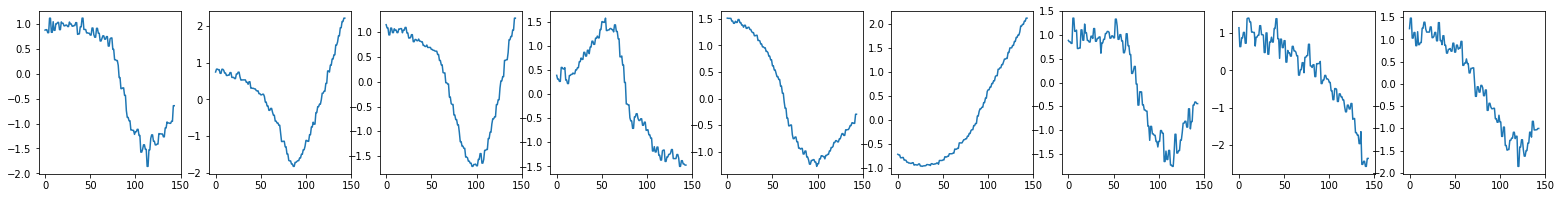

2.0


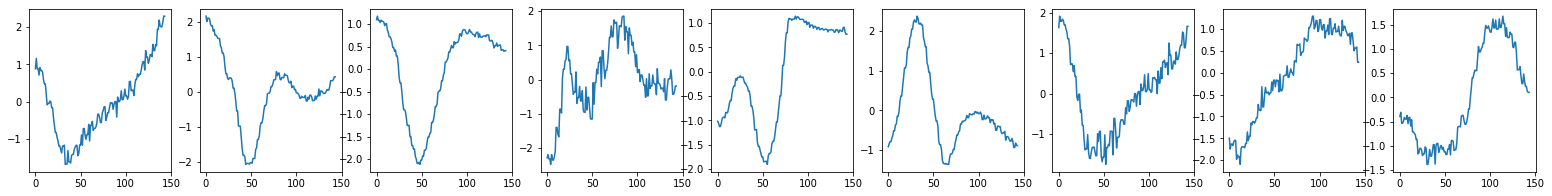

3.0


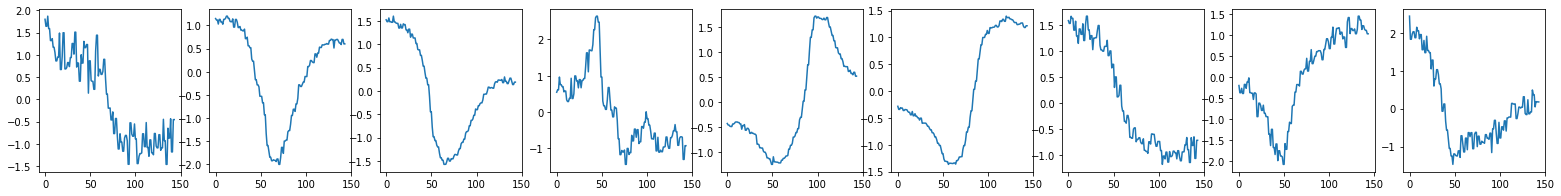

4.0


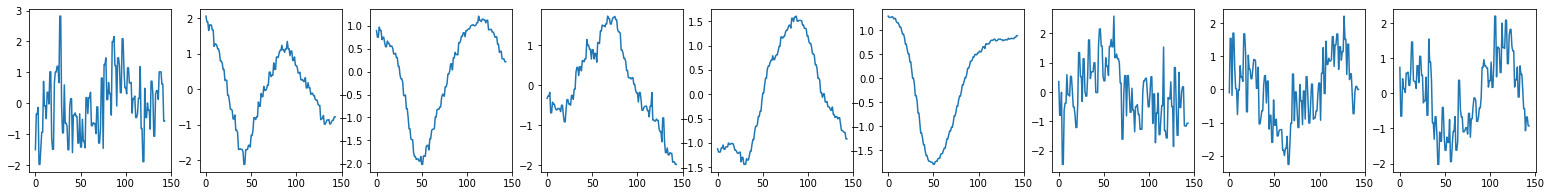

5.0


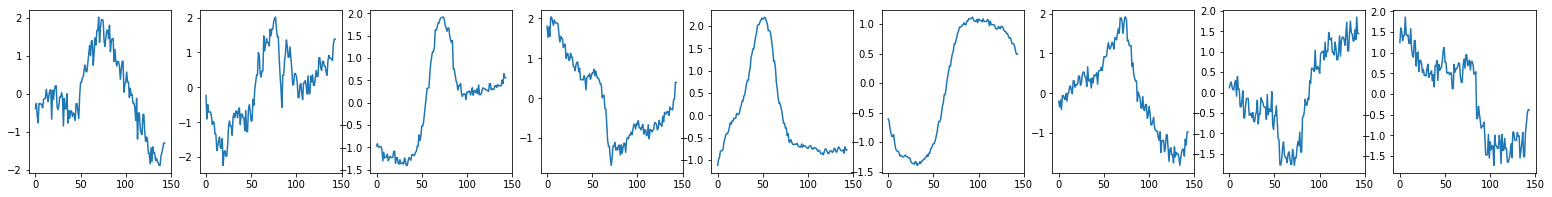

6.0


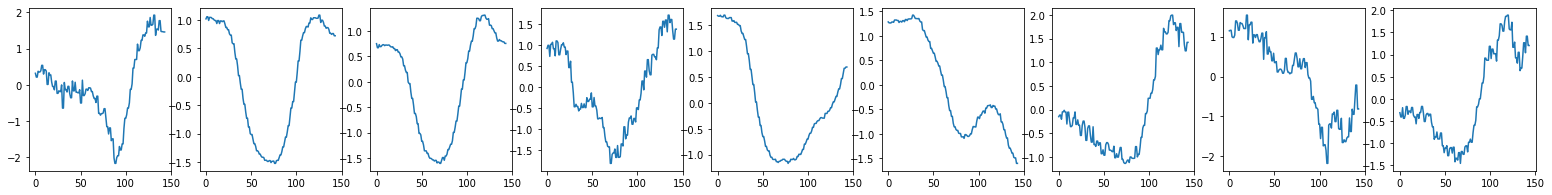

7.0


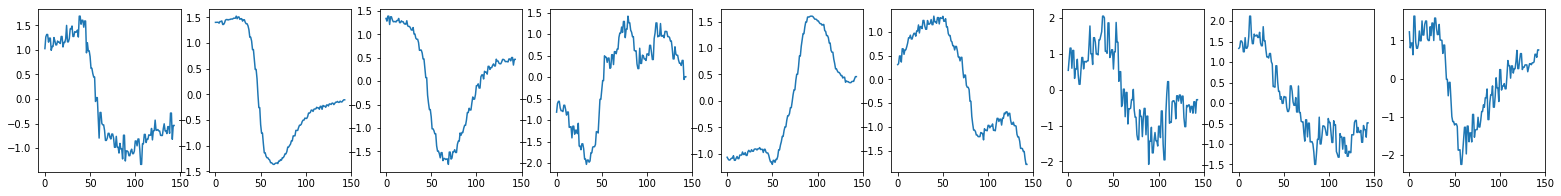

8.0


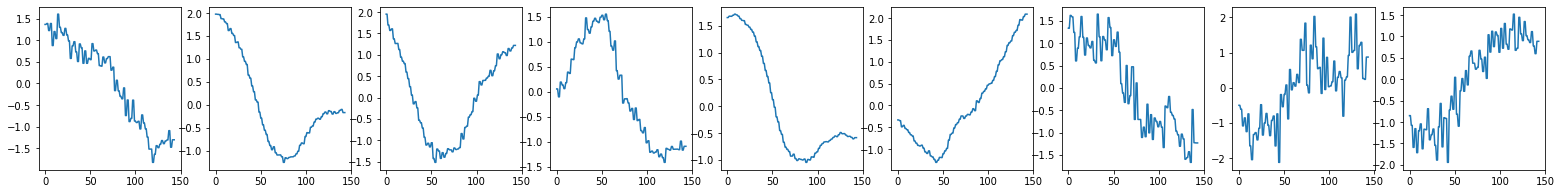

9.0


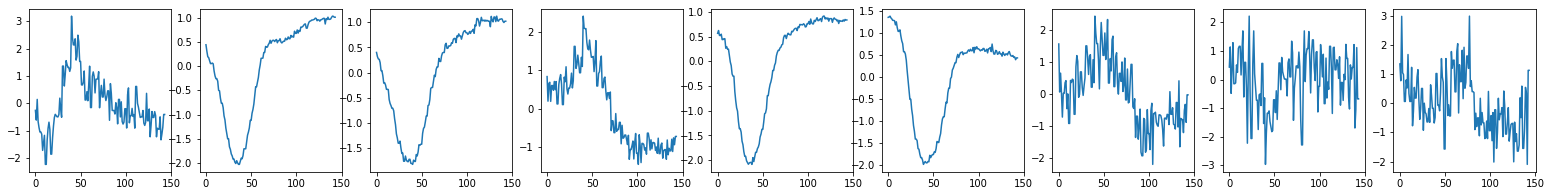

10.0


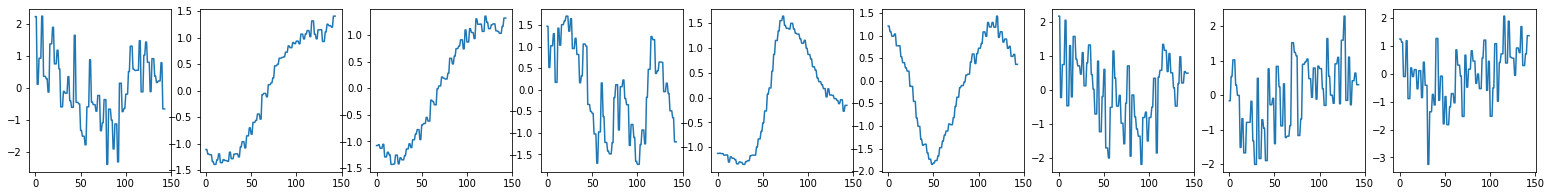

In [ ]:
x = [0,18,27,36,54,63,72,81,90,99]
for a in range(len(x)):
    print(y2[x[a]])
    figure, axis = plt.subplots(1, 9, figsize=(27,3))
    for j in range(9):
        axis[j].plot(X_3d[x[a]][j])
    plt.show()

In [ ]:
list_output = []
for ts in X_2dlist:
  temp = ts.copy()
  temp = pd.DataFrame(temp)
  temp.columns = ['value']
  model = TsFeatures()
  output_feature = model.transform(temp)
  #print(output_feature)
  list_output.append(output_feature)

In [ ]:
df_features2 = pd.DataFrame(list_output) # converting to dataframe
df_features2['Dataset'] = 'Word Recognition'
df_features2.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma,Dataset
0,1296,0.004288,1.040869,0.386608,0.066547,0.900995,1,0.610628,0.132553,37,...,0.880487,-0.041174,69,38,0.987889,0.000000e+00,NaN,NaN,NaN,Word Recognition
1,1296,-0.001882,0.862796,0.612834,0.142600,0.619594,1,0.389974,0.245935,87,...,0.704059,0.022734,45,31,0.883316,5.350369e-15,NaN,NaN,NaN,Word Recognition
2,1296,-0.004160,1.153428,0.373655,0.017970,1.019900,1,0.586879,0.156746,45,...,0.886779,-0.140068,72,38,0.885317,0.000000e+00,NaN,NaN,NaN,Word Recognition
3,1296,0.017179,0.882351,0.575361,0.092695,0.646850,1,0.334926,0.282076,85,...,0.711143,0.038159,48,37,0.711859,1.639223e-19,NaN,NaN,NaN,Word Recognition
4,1296,0.017215,1.570763,0.388466,0.125868,1.314147,1,0.562416,0.211239,52,...,0.838802,-0.000765,66,33,0.841909,3.141429e-09,NaN,NaN,NaN,Word Recognition


In [ ]:
df_features2['Dataset'] = 'Word Recognition'
final = pd.concat([final, df_features2])

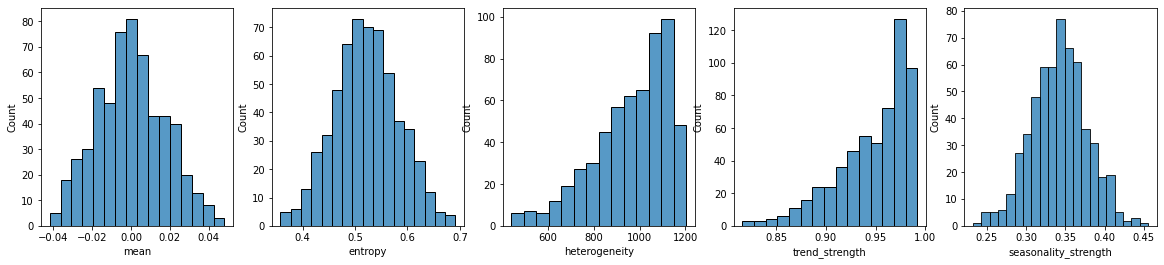

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features2, x="mean", ax=ax[0])
sns.histplot(data=df_features2, x="entropy", ax=ax[1])
sns.histplot(data=df_features2, x="heterogeneity", ax=ax[2])
sns.histplot(data=df_features2, x="trend_strength", ax=ax[3])
sns.histplot(data=df_features2, x="seasonality_strength", ax=ax[4])
fig.show()



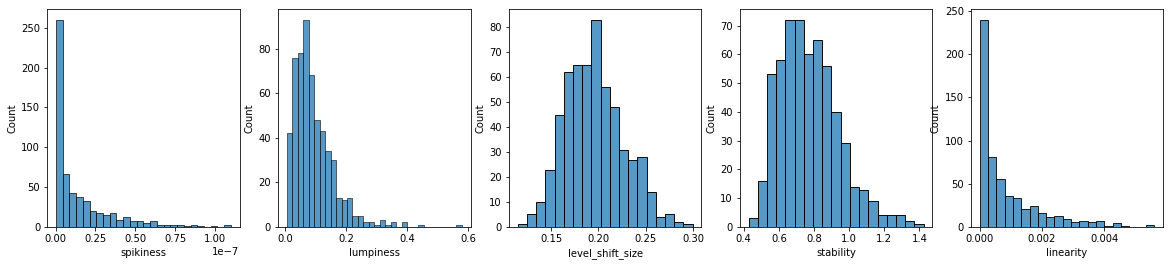

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features2, x="spikiness", ax=ax[0])
sns.histplot(data=df_features2, x="lumpiness", ax=ax[1])
sns.histplot(data=df_features2, x="level_shift_size", ax=ax[2])
sns.histplot(data=df_features2, x="stability", ax=ax[3])
sns.histplot(data=df_features2, x="linearity", ax=ax[4])
fig.show()

In [ ]:
entropy.append(['Word Recognition',np.mean(df_features2['entropy'])])

In [ ]:
X, y3 = load_UCR_UEA_dataset('AtrialFibrillation', split=None, return_X_y=True)

X_2d = from_nested_to_2d_array(X)
X_3d = from_nested_to_3d_numpy(X)
scaler = StandardScaler()
X_2dlist = scaler.fit_transform(X_2d)

In [ ]:
X_3d.shape

(30, 2, 640)

n


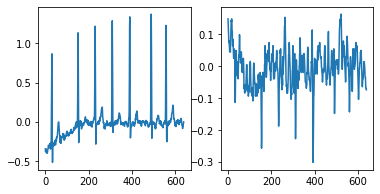

n


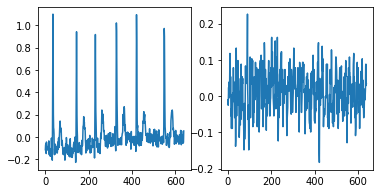

s


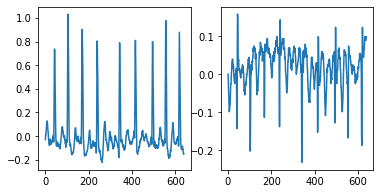

s


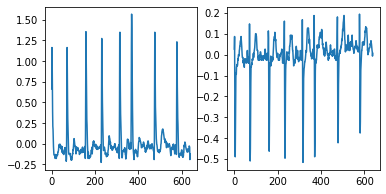

t


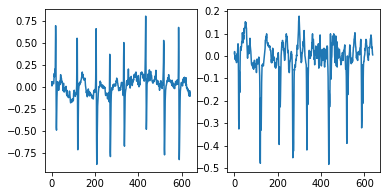

t


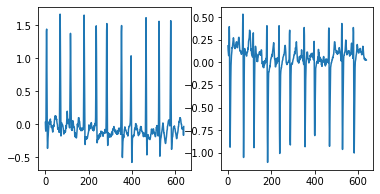

In [ ]:
x = [0,1,5,6,11,12]
for a in range(len(x)):
    print(y3[x[a]])
    figure, axis = plt.subplots(1, 2, figsize=(6,3))
    for j in range(2):
        axis[j].plot(X_3d[x[a]][j])
    plt.show()

In [ ]:
list_output = []
for ts in X_2dlist:
  temp = ts.copy()
  temp = pd.DataFrame(temp)
  temp.columns = ['value']
  model = TsFeatures()
  output_feature = model.transform(temp)
  #print(output_feature)
  list_output.append(output_feature)

df_features3 = pd.DataFrame(list_output) # converting to dataframe
df_features3.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
0,1280,-0.106967,0.645945,0.753287,0.650091,0.207219,1,0.066993,0.364668,194,...,0.261512,0.145685,0.024909,9,113,1.000000,2.498715e-10,NaN,NaN,NaN
1,1280,0.002693,0.483695,0.817694,0.265155,0.104673,1,0.066458,0.353601,303,...,0.490923,-0.011282,-0.017397,12,7,0.968664,5.475260e-19,NaN,NaN,NaN
2,1280,-0.870021,1.652690,0.780999,3.684153,0.323524,1,0.069878,0.610694,201,...,0.233934,-0.051268,-0.083567,6,5,1.000000,1.912305e-11,NaN,NaN,NaN
3,1280,0.042756,1.467501,0.729419,2.158297,0.414764,1,0.121854,0.495004,137,...,0.223737,0.075119,0.018098,13,11,1.000000,0.000000e+00,NaN,NaN,NaN
4,1280,-0.018035,0.578934,0.723328,0.349173,0.206655,1,0.053638,0.334886,153,...,0.259401,0.159138,-0.049132,9,83,1.000000,0.000000e+00,NaN,NaN,NaN


In [ ]:
df_features3['Dataset'] = 'Atrial Fabrillation'
final = pd.concat([final, df_features3])

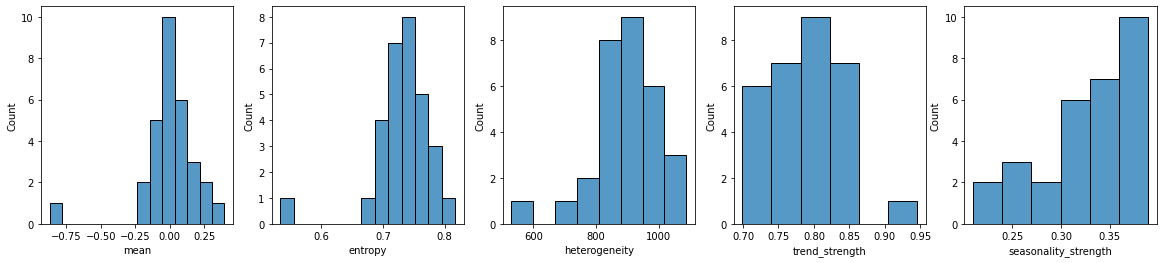

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features3, x="mean", ax=ax[0])
sns.histplot(data=df_features3, x="entropy", ax=ax[1])
sns.histplot(data=df_features3, x="heterogeneity", ax=ax[2])
sns.histplot(data=df_features3, x="trend_strength", ax=ax[3])
sns.histplot(data=df_features3, x="seasonality_strength", ax=ax[4])
fig.show()

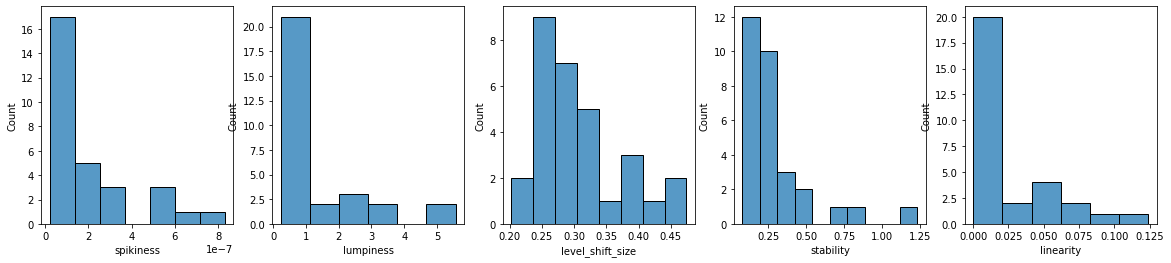

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features3, x="spikiness", ax=ax[0])
sns.histplot(data=df_features3, x="lumpiness", ax=ax[1])
sns.histplot(data=df_features3, x="level_shift_size", ax=ax[2])
sns.histplot(data=df_features3, x="stability", ax=ax[3])
sns.histplot(data=df_features3, x="linearity", ax=ax[4])
fig.show()

In [ ]:
entropy.append(['Atrial Fibrillation',np.mean(df_features3['entropy'])])

In [ ]:
X, y4 = load_UCR_UEA_dataset('Cricket', split=None, return_X_y=True)

X_2d = from_nested_to_2d_array(X)
X_3d = from_nested_to_3d_numpy(X)
scaler = StandardScaler()
X_2dlist = scaler.fit_transform(X_2d)

In [ ]:
X_3d.shape

(180, 6, 1197)

1.0


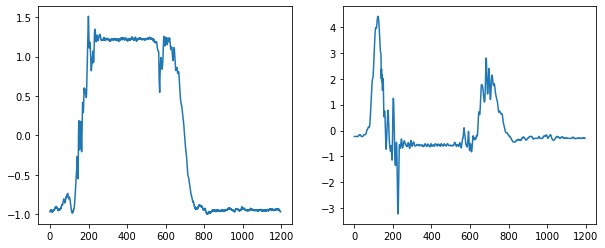

2.0


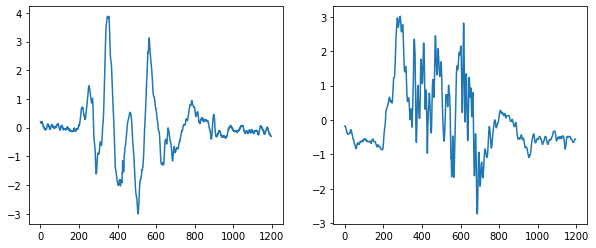

3.0


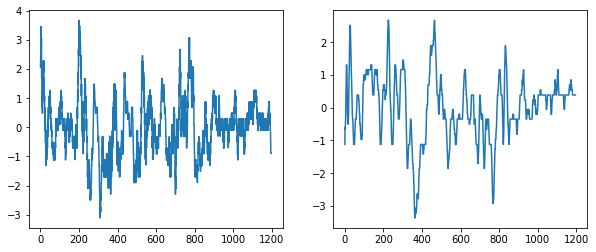

4.0


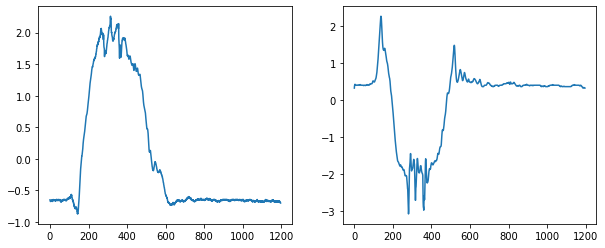

5.0


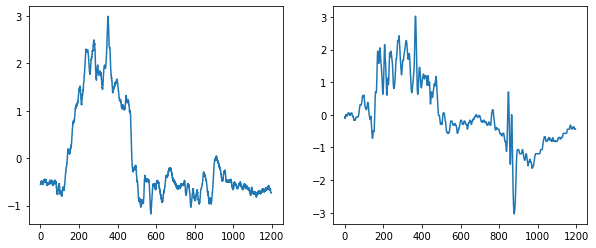

6.0


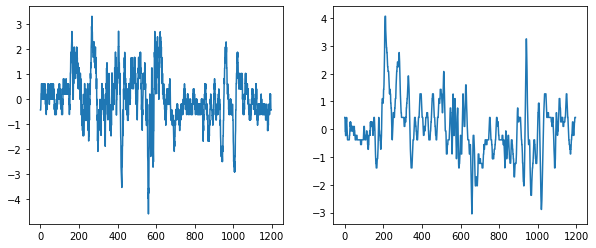

7.0


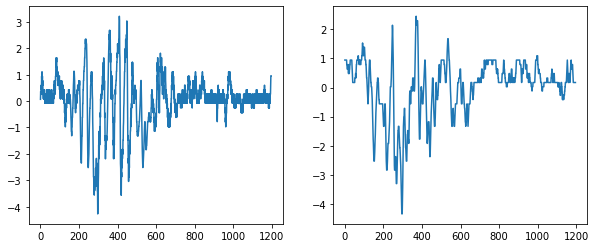

8.0


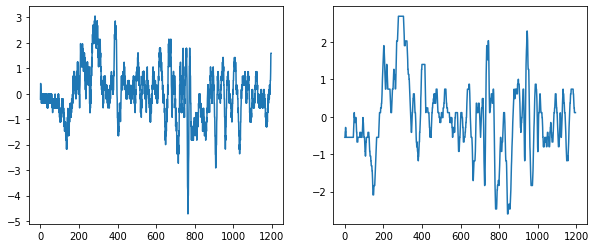

9.0


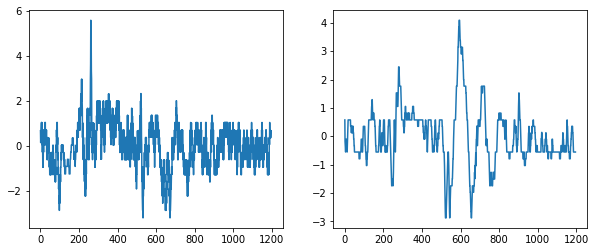

10.0


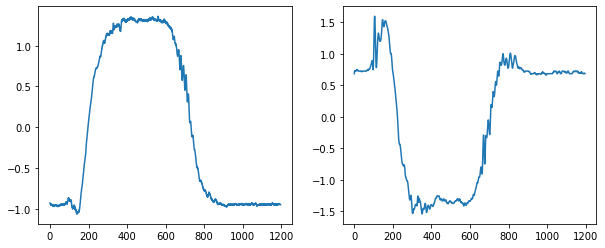

11.0


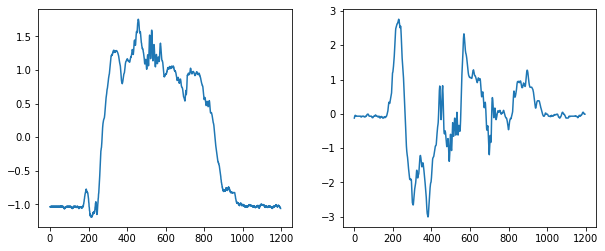

In [ ]:
x = [0,9,18,27,36,45,54,63,72,81,90]
for a in range(len(x)):
    print(y4[x[a]])
    figure, axis = plt.subplots(1, 2, figsize=(10,4))
    for j in range(2):
        axis[j].plot(X_3d[x[a]][j])
    plt.show()

In [ ]:
list_output = []
for ts in X_2dlist:
  temp = ts.copy()
  temp = pd.DataFrame(temp)
  temp.columns = ['value']
  model = TsFeatures()
  output_feature = model.transform(temp)
  #print(output_feature)
  list_output.append(output_feature)

df_features4 = pd.DataFrame(list_output) # converting to dataframe
df_features4.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
0,7182,-0.113881,0.743069,0.497173,0.054371,0.687454,1,0.523555,0.069215,82,...,0.777330,0.913690,-0.255892,129,233,0.857794,0.857794,NaN,NaN,NaN
1,7182,-0.042518,0.653910,0.529105,0.040252,0.586133,1,0.543535,0.075146,130,...,0.420070,0.885052,-0.240324,83,189,0.888051,0.888051,NaN,NaN,NaN
2,7182,-0.071512,0.515272,0.495906,0.007039,0.482907,1,0.609598,0.048508,103,...,0.960628,0.936135,-0.276507,319,244,0.794284,0.794284,NaN,NaN,NaN
3,7182,-0.032873,0.588027,0.519661,0.075849,0.539516,1,0.458953,0.080300,143,...,0.592221,0.888147,-0.295683,85,216,0.942190,0.942190,NaN,NaN,NaN
4,7182,-0.057248,0.611065,0.507019,0.073098,0.553168,1,0.399292,0.081490,93,...,0.421494,0.885049,-0.269398,253,177,0.918319,0.918319,NaN,NaN,NaN


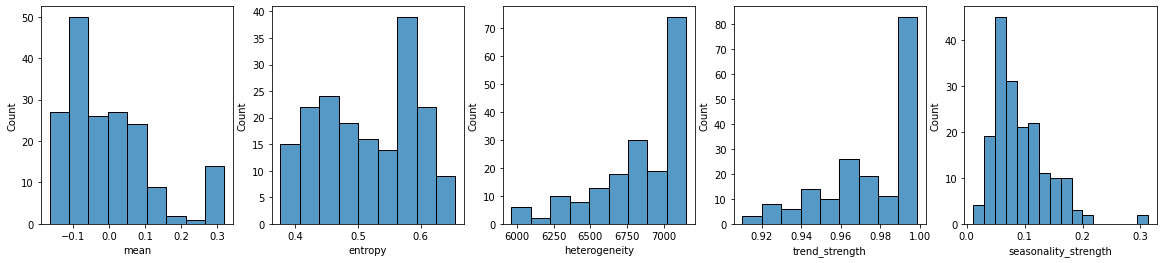

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features4, x="mean", ax=ax[0])
sns.histplot(data=df_features4, x="entropy", ax=ax[1])
sns.histplot(data=df_features4, x="heterogeneity", ax=ax[2])
sns.histplot(data=df_features4, x="trend_strength", ax=ax[3])
sns.histplot(data=df_features4, x="seasonality_strength", ax=ax[4])
fig.show()

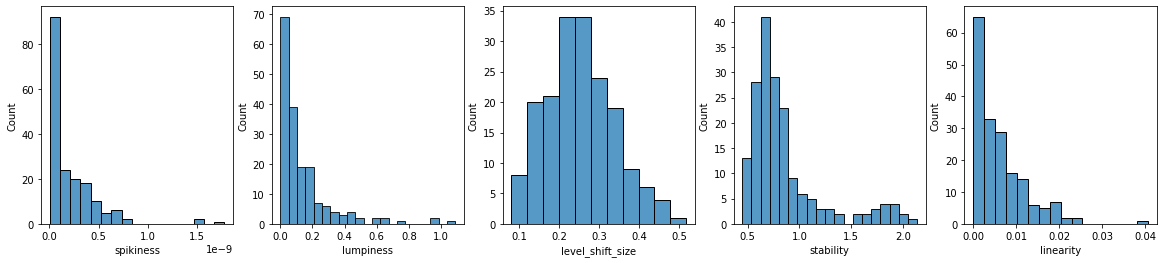

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features4, x="spikiness", ax=ax[0])
sns.histplot(data=df_features4, x="lumpiness", ax=ax[1])
sns.histplot(data=df_features4, x="level_shift_size", ax=ax[2])
sns.histplot(data=df_features4, x="stability", ax=ax[3])
sns.histplot(data=df_features4, x="linearity", ax=ax[4])
fig.show()

In [ ]:
df_features4['Dataset'] = 'Cricket'
final = pd.concat([final, df_features4])

In [ ]:
entropy.append(['Cricket',np.mean(df_features4['entropy'])])

In [ ]:
X, y5 = load_UCR_UEA_dataset('Epilepsy', split=None, return_X_y=True)

X_2d = from_nested_to_2d_array(X)
X_3d = from_nested_to_3d_numpy(X)
scaler = StandardScaler()
X_2dlist = scaler.fit_transform(X_2d)

In [ ]:
X_3d.shape

(275, 3, 206)

epilepsy


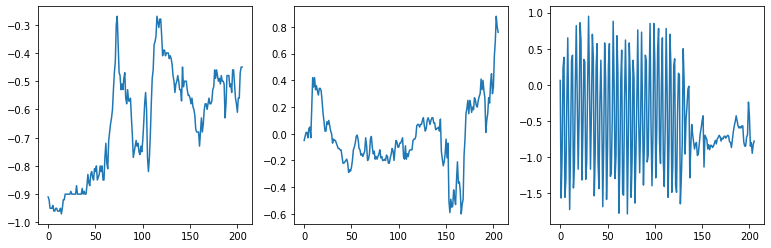

epilepsy


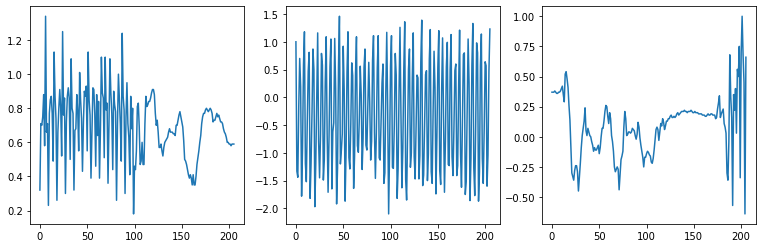

walking


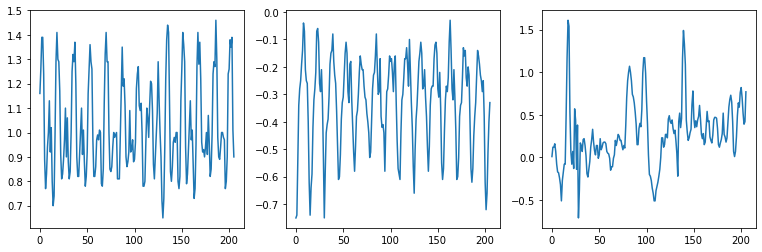

walking


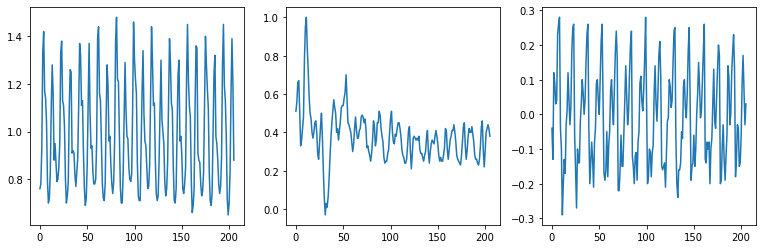

running


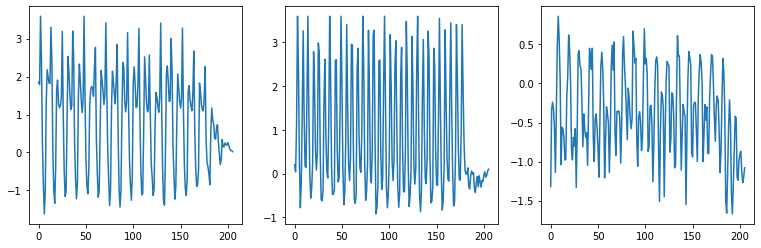

running


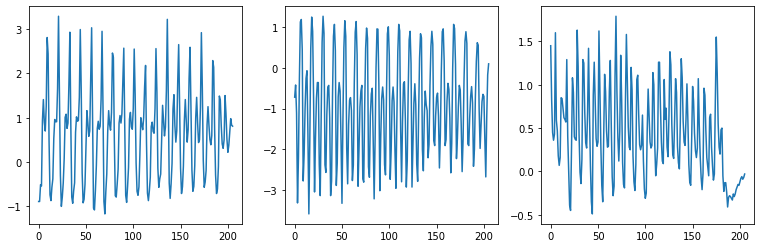

sawing


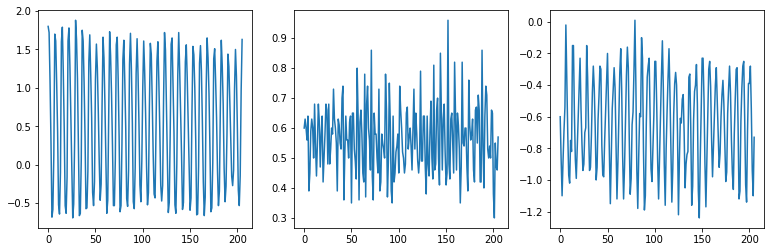

sawing


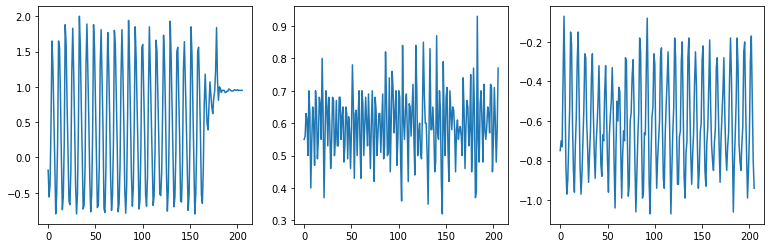

In [ ]:
x = [1,2,35,36,97,98,107,108]
for a in range(len(x)):
    print(y5[x[a]])
    figure, axis = plt.subplots(1, 3, figsize=(13,4))
    for j in range(3):
        axis[j].plot(X_3d[x[a]][j])
    plt.show()

In [ ]:

list_output = []
for ts in X_2dlist:
  temp = ts.copy()
  temp = pd.DataFrame(temp)
  temp.columns = ['value']
  model = TsFeatures()
  output_feature = model.transform(temp)
  #print(output_feature)
  list_output.append(output_feature)

df_features5 = pd.DataFrame(list_output) # converting to dataframe
df_features5.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
0,618,0.416200,0.742125,0.615573,0.146300,0.419153,1,0.263878,0.379217,79,...,1.195680,0.442387,-0.093786,3,22,0.395793,9.421122e-19,NaN,NaN,NaN
1,618,-0.375649,0.816592,0.559641,0.983357,0.226264,1,0.040861,0.711939,90,...,1.663633,-0.157120,0.089039,2,2,0.062813,0.000000e+00,NaN,NaN,NaN
2,618,0.371385,0.544831,0.611853,0.211747,0.129411,1,0.020623,0.584216,183,...,1.256327,-0.281989,0.000948,2,2,0.062012,0.000000e+00,NaN,NaN,NaN
3,618,-0.272410,0.312639,0.658541,0.076278,0.171916,1,0.151002,0.263254,132,...,0.854227,0.374223,-0.049298,2,58,1.000000,4.902216e-16,NaN,NaN,NaN
4,618,0.088133,1.001689,0.569558,0.859129,0.132218,1,0.041054,0.901412,178,...,1.926966,-0.436079,0.069772,2,2,0.021329,0.000000e+00,NaN,NaN,NaN


In [ ]:
df_features5['Dataset'] = 'Epilepsy'
final = pd.concat([final, df_features5])

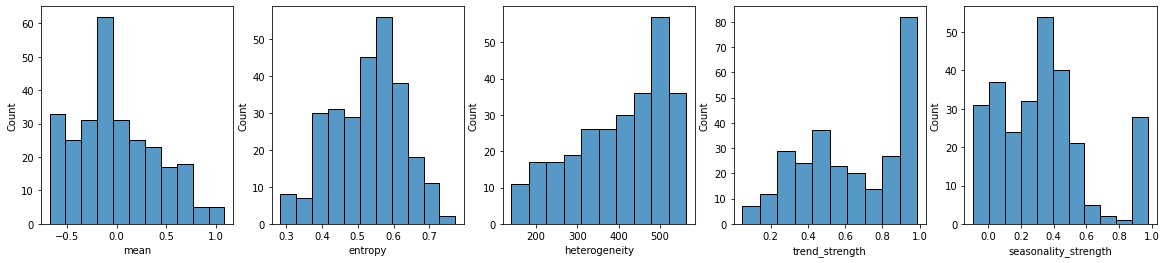

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features5, x="mean", ax=ax[0])
sns.histplot(data=df_features5, x="entropy", ax=ax[1])
sns.histplot(data=df_features5, x="heterogeneity", ax=ax[2])
sns.histplot(data=df_features5, x="trend_strength", ax=ax[3])
sns.histplot(data=df_features5, x="seasonality_strength", ax=ax[4])
fig.show()

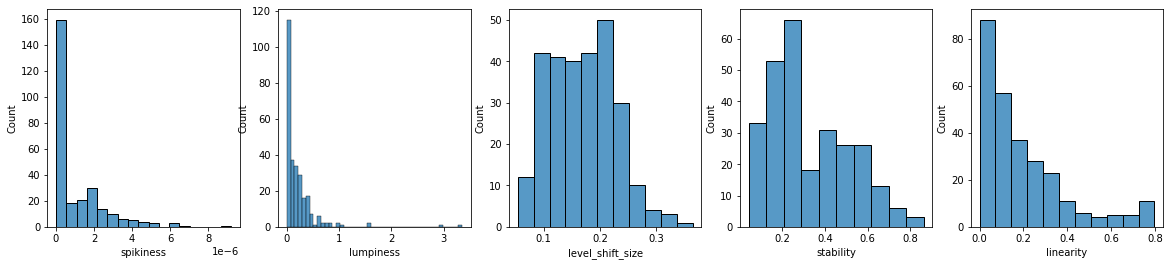

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features5, x="spikiness", ax=ax[0])
sns.histplot(data=df_features5, x="lumpiness", ax=ax[1])
sns.histplot(data=df_features5, x="level_shift_size", ax=ax[2])
sns.histplot(data=df_features5, x="stability", ax=ax[3])
sns.histplot(data=df_features5, x="linearity", ax=ax[4])
fig.show()

In [ ]:
entropy.append(['Epilepsy',np.mean(df_features5['entropy'])])

In [ ]:
X, y6 = load_UCR_UEA_dataset('FingerMovements', split=None, return_X_y=True)

X_2d = from_nested_to_2d_array(X)
X_3d = from_nested_to_3d_numpy(X)
scaler = StandardScaler()
X_2dlist = scaler.fit_transform(X_2d)

In [ ]:
X_3d.shape

(416, 28, 50)

right


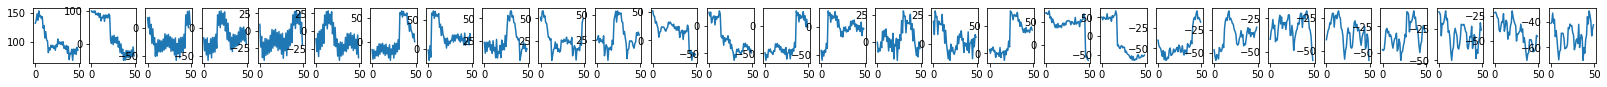

left


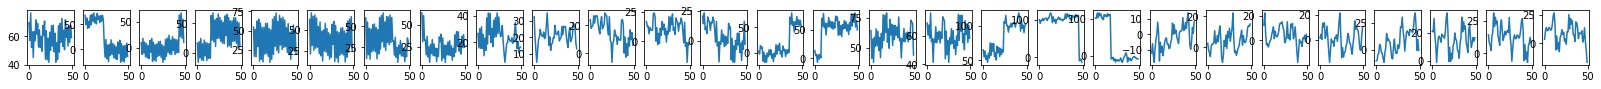

right


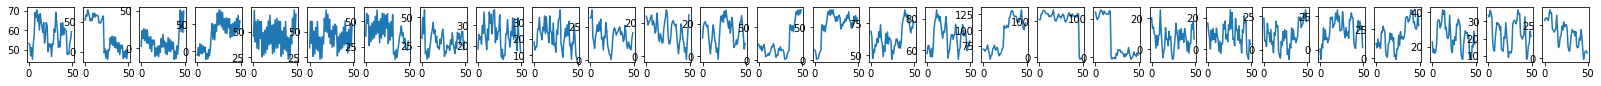

left


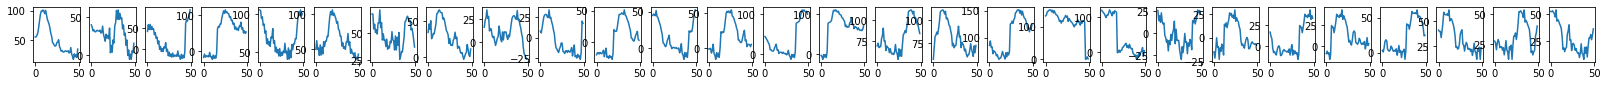

In [ ]:
x = [1,2,3,4]
for a in range(len(x)):
    print(y6[x[a]])
    figure, axis = plt.subplots(1, 28, figsize=(28,1))
    for j in range(28):
        axis[j].plot(X_3d[x[a]][j])
    plt.show()

In [ ]:


list_output = []
for ts in X_2dlist:
  temp = ts.copy()
  temp = pd.DataFrame(temp)
  temp.columns = ['value']
  model = TsFeatures()
  output_feature = model.transform(temp)
  #print(output_feature)
  list_output.append(output_feature)

df_features6 = pd.DataFrame(list_output) # converting to dataframe
df_features6.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
0,1400,0.592390,0.359942,0.597719,0.029213,0.115428,1,0.007273,0.237409,372,...,0.895650,0.070364,-0.141851,9,9,0.666211,2.896377e-20,NaN,NaN,NaN
1,1400,-0.970863,0.936557,0.488947,0.043740,0.752128,1,0.175905,0.162438,219,...,1.234913,0.716845,-0.147760,1,145,0.488193,1.226894e-16,NaN,NaN,NaN
2,1400,-0.044699,0.172400,0.564504,0.013461,0.039196,1,0.076886,0.143214,676,...,1.300658,-0.284554,0.022730,1,3,0.084101,1.121971e-17,NaN,NaN,NaN
3,1400,0.170764,0.137744,0.615090,0.001972,0.058468,1,0.036264,0.146287,402,...,1.210833,0.205563,-0.069599,1,57,0.427189,3.723391e-14,NaN,NaN,NaN
4,1400,0.224411,0.546083,0.537535,0.040106,0.350735,1,0.277775,0.180291,187,...,0.603139,0.556328,-0.061562,15,43,0.911103,1.940296e-12,NaN,NaN,NaN


In [ ]:
df_features6['Dataset'] = 'Finger Movements'
final = pd.concat([final, df_features6])

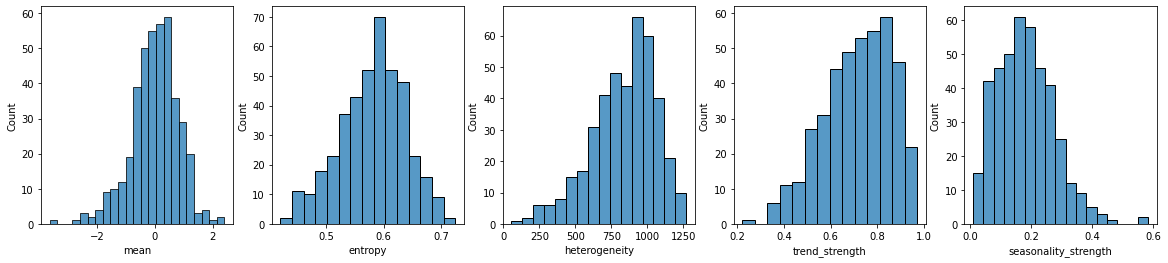

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features6, x="mean", ax=ax[0])
sns.histplot(data=df_features6, x="entropy", ax=ax[1])
sns.histplot(data=df_features6, x="heterogeneity", ax=ax[2])
sns.histplot(data=df_features6, x="trend_strength", ax=ax[3])
sns.histplot(data=df_features6, x="seasonality_strength", ax=ax[4])
fig.show()

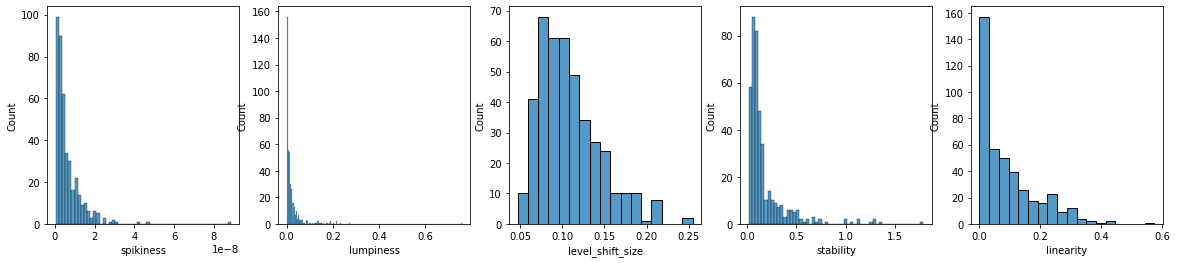

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features6, x="spikiness", ax=ax[0])
sns.histplot(data=df_features6, x="lumpiness", ax=ax[1])
sns.histplot(data=df_features6, x="level_shift_size", ax=ax[2])
sns.histplot(data=df_features6, x="stability", ax=ax[3])
sns.histplot(data=df_features6, x="linearity", ax=ax[4])
fig.show()

In [ ]:
entropy.append(['Finger Movements',np.mean(df_features6['entropy'])])

In [ ]:
X, y7 = load_UCR_UEA_dataset('Handwriting', split=None, return_X_y=True)

X_2d = from_nested_to_2d_array(X)
X_3d = from_nested_to_3d_numpy(X)
scaler = StandardScaler()
X_2dlist = scaler.fit_transform(X_2d)

In [ ]:
X_3d.shape

(1000, 3, 152)

21.0


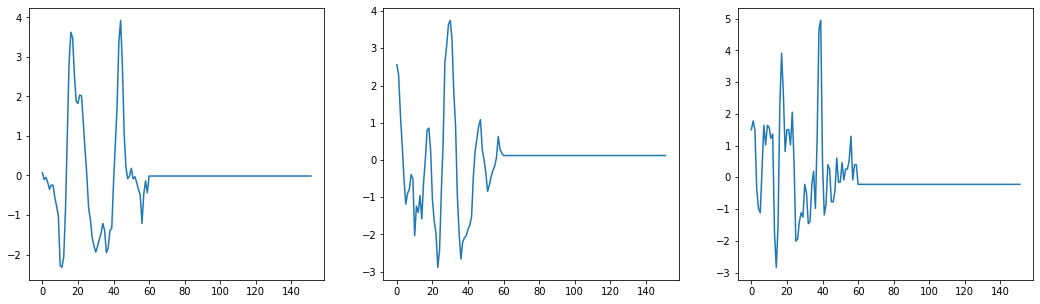

22.0


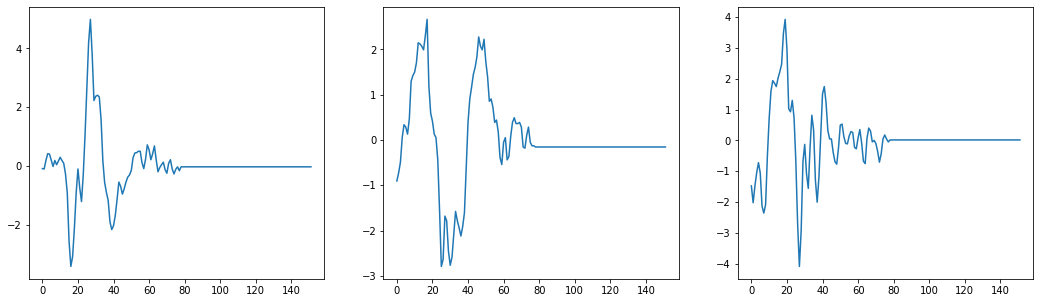

17.0


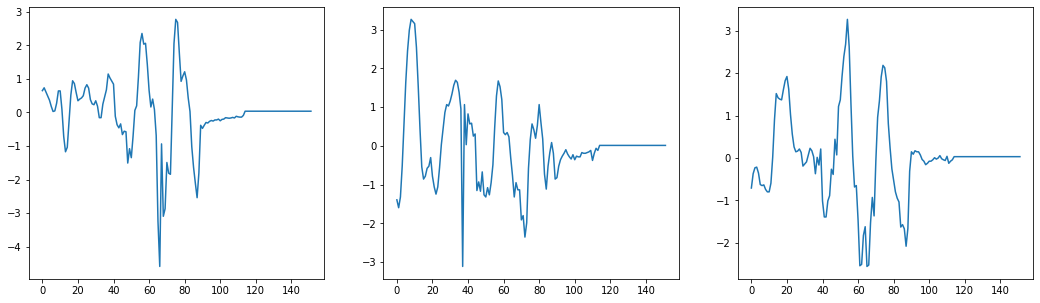

26.0


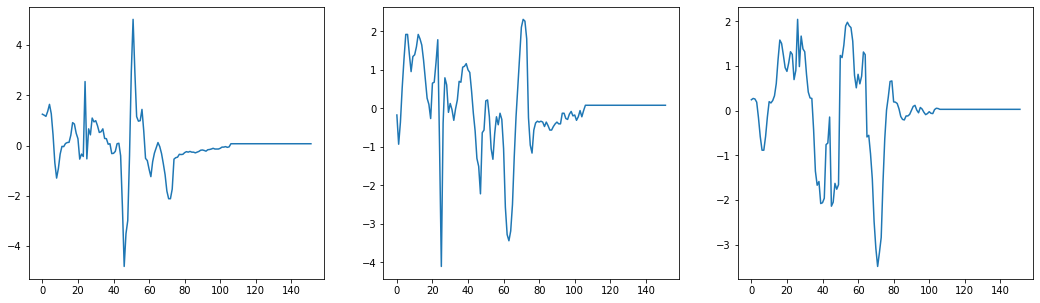

In [ ]:
x = [0,1,4,9]
for a in range(len(x)):
    print(y7[x[a]])
    figure, axis = plt.subplots(1, 3, figsize=(18,5))
    for j in range(3):
        axis[j].plot(X_3d[x[a]][j])
    plt.show()

In [ ]:


list_output = []
for ts in X_2dlist:
  temp = ts.copy()
  temp = pd.DataFrame(temp)
  temp.columns = ['value']
  model = TsFeatures()
  output_feature = model.transform(temp)
  #print(output_feature)
  list_output.append(output_feature)

df_features7 = pd.DataFrame(list_output) # converting to dataframe
df_features7.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
0,456,-0.139125,1.510568,0.572000,0.294629,1.082944,2,0.113297,0.358500,42,...,0.269782,0.557184,0.103079,13,81,1.0,7.687474e-14,NaN,NaN,NaN
1,456,-0.134157,0.719353,0.643521,0.299182,0.315365,2,0.216897,0.261607,39,...,0.390904,0.380263,-0.054217,14,47,1.0,0.000000e+00,NaN,NaN,NaN
2,456,-0.226720,0.550376,0.646940,0.377534,0.165670,2,0.145652,0.260745,41,...,0.370509,0.123923,-0.020207,11,9,1.0,2.438980e-16,NaN,NaN,NaN
3,456,0.237150,0.672021,0.672578,0.997573,0.150819,2,0.030918,0.339121,37,...,0.197077,-0.120214,-0.051033,10,6,1.0,1.601860e-11,NaN,NaN,NaN
4,456,0.012064,1.106954,0.653033,1.372433,0.213112,2,0.067786,0.421358,58,...,0.377033,-0.145457,-0.163821,10,6,1.0,1.283935e-15,NaN,NaN,NaN


In [ ]:
df_features7['Dataset'] = 'Handwriting'
final = pd.concat([final, df_features7])

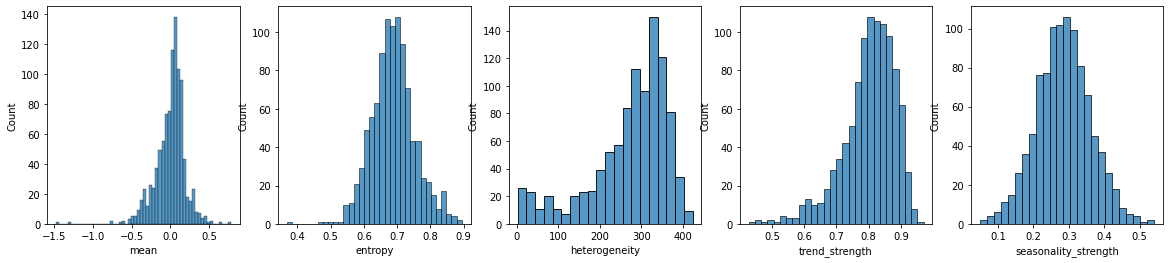

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features7, x="mean", ax=ax[0])
sns.histplot(data=df_features7, x="entropy", ax=ax[1])
sns.histplot(data=df_features7, x="heterogeneity", ax=ax[2])
sns.histplot(data=df_features7, x="trend_strength", ax=ax[3])
sns.histplot(data=df_features7, x="seasonality_strength", ax=ax[4])
fig.show()

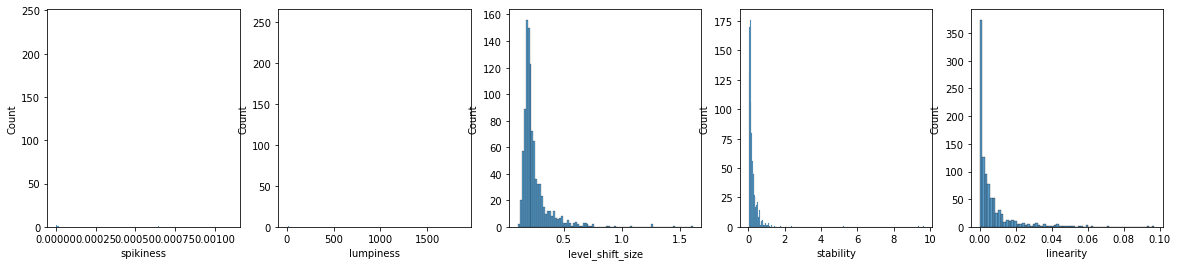

In [ ]:
fig, ax =plt.subplots(1, 5, figsize = (20, 4))
sns.histplot(data=df_features7, x="spikiness", ax=ax[0])
sns.histplot(data=df_features7, x="lumpiness", ax=ax[1])
sns.histplot(data=df_features7, x="level_shift_size", ax=ax[2])
sns.histplot(data=df_features7, x="stability", ax=ax[3])
sns.histplot(data=df_features7, x="linearity", ax=ax[4])
fig.show()

In [ ]:
df_features7.columns

Index(['length', 'mean', 'var', 'entropy', 'lumpiness', 'stability',
       'flat_spots', 'hurst', 'std1st_der', 'crossing_points', 'binarize_mean',
       'unitroot_kpss', 'heterogeneity', 'histogram_mode', 'linearity',
       'trend_strength', 'seasonality_strength', 'spikiness', 'peak', 'trough',
       'level_shift_idx', 'level_shift_size', 'y_acf1', 'y_acf5',
       'diff1y_acf1', 'diff1y_acf5', 'diff2y_acf1', 'diff2y_acf5', 'y_pacf5',
       'diff1y_pacf5', 'diff2y_pacf5', 'seas_acf1', 'seas_pacf1',
       'firstmin_ac', 'firstzero_ac', 'holt_alpha', 'holt_beta', 'hw_alpha',
       'hw_beta', 'hw_gamma', 'Dataset'],
      dtype='object')

In [ ]:
entropy.append(['Handwriting',np.mean(df_features7['entropy'])])

In [ ]:
final = final.reset_index(drop=True)
final

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma,Dataset
0,600,0.045793,0.096271,0.638338,0.002380,0.053118,1,0.047007,0.134990,106,...,0.417080,0.206065,6,88,0.935452,1.587357e-12,NaN,NaN,NaN,Basic Motions
1,600,-0.011976,0.164300,0.797443,0.060625,0.056302,1,0.053447,0.203576,101,...,0.231711,0.087312,6,73,0.937234,0.000000e+00,NaN,NaN,NaN,Basic Motions
2,600,0.044466,0.097792,0.602372,0.000811,0.059037,1,0.032809,0.127373,110,...,0.426003,0.211112,6,91,1.000000,4.424669e-13,NaN,NaN,NaN,Basic Motions
3,600,0.030277,0.078678,0.607611,0.000457,0.049493,1,0.057524,0.113874,119,...,0.559225,0.257566,5,88,0.906036,1.330326e-13,NaN,NaN,NaN,Basic Motions
4,600,0.022441,0.072177,0.536830,0.000110,0.051343,1,0.075572,0.095869,106,...,0.642463,0.223286,5,87,0.979956,8.025037e-13,NaN,NaN,NaN,Basic Motions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,456,-0.003708,1.102410,0.615710,0.872068,0.188769,2,0.172620,0.343950,37,...,-0.009570,-0.138819,13,7,1.000000,6.288996e-01,NaN,NaN,NaN,Handwriting
2552,456,-0.093436,0.704552,0.715370,0.608511,0.185339,2,0.080658,0.339246,42,...,-0.037538,0.015456,8,7,1.000000,0.000000e+00,NaN,NaN,NaN,Handwriting
2553,456,0.010019,0.514452,0.730735,0.274483,0.086585,2,0.016731,0.330445,63,...,-0.156311,-0.047595,6,5,1.000000,0.000000e+00,NaN,NaN,NaN,Handwriting
2554,456,0.114808,0.500164,0.637066,0.328345,0.084172,2,0.076609,0.236552,40,...,-0.166723,-0.111266,11,7,1.000000,8.308508e-01,NaN,NaN,NaN,Handwriting


In [ ]:
final.groupby('Dataset').mean()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
Dataset,,,,,,,,,,,,,,,,,,,,,
Atrial Fabrillation,1280.0,3.793262e-17,0.956361,0.732757,1.326227,0.286923,1.0,0.124622,0.398297,162.866667,...,0.273396,0.110331,-0.027036,13.133333,33.000000,0.998955,1.323929e-02,NaN,NaN,NaN
Basic Motions,600.0,4.857226e-18,0.996673,0.744123,0.630846,0.098126,1.0,-0.005740,0.549796,138.025000,...,0.469976,0.076249,0.100047,5.212500,24.212500,0.795456,8.050013e-09,NaN,NaN,NaN
Cricket,7182.0,2.544261e-17,0.985533,0.516064,0.138552,0.856744,1.0,0.491100,0.101696,301.783333,...,0.879701,0.831359,-0.175701,102.783333,216.094444,0.749395,5.380736e-01,NaN,NaN,NaN
Epilepsy,618.0,-2.462677e-17,0.834375,0.525518,0.206013,0.324354,1.0,0.042158,0.505389,120.203636,...,0.891691,0.386162,0.007129,4.796364,72.170909,0.735336,3.128646e-02,NaN,NaN,NaN
Finger Movements,1400.0,-1.059516e-16,0.327436,0.581074,0.023929,0.179505,1.0,0.109448,0.175268,419.865385,...,1.092522,0.252687,-0.087828,2.353365,62.269231,0.419035,1.864542e-03,0.383204,8.694744e-10,1.307197e-10
Handwriting,456.0,-4.063416e-17,0.964678,0.687698,4.811281,0.245734,2.0,0.081096,0.380899,48.335000,...,0.311650,-0.038513,-0.040751,10.400000,13.336000,0.962387,2.597340e-01,NaN,NaN,NaN
Word Recognition,1296.0,-5.677825e-18,0.999698,0.521606,0.094382,0.774965,1.0,0.474202,0.223025,86.888696,...,0.693732,0.774391,-0.044229,50.977391,33.366957,0.753007,1.473376e-02,NaN,NaN,NaN


In [ ]:
# performing dimension reduction on the time series samples
ls_features = ['length', 'mean', 'var', 'entropy', 'lumpiness', 'stability',
       'flat_spots', 'heterogeneity', 'histogram_mode', 'linearity',
       'trend_strength', 'seasonality_strength', 'spikiness', 'peak', 
       'level_shift_idx', 'level_shift_size']


df_dataset = df_features[ls_features]
x_2d = PCA(n_components=2).fit_transform(X=StandardScaler().fit_transform(df_dataset[ls_features].values))
df_dataset['pca_component_1'] = x_2d[:,0]
df_dataset['pca_component_2'] = x_2d[:,1]

tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_dataset[ls_features].values)
df_dataset['tsne-2d-one'] = tsne_results[:,0]
df_dataset['tsne-2d-two'] = tsne_results[:,1]


df_dataset2 = df_features2[ls_features]
x_2d = PCA(n_components=2).fit_transform(X=StandardScaler().fit_transform(df_dataset2[ls_features].values))
df_dataset2['pca_component_1'] = x_2d[:,0]
df_dataset2['pca_component_2'] = x_2d[:,1]

tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_dataset2[ls_features].values)
df_dataset2['tsne-2d-one'] = tsne_results[:,0]
df_dataset2['tsne-2d-two'] = tsne_results[:,1]


df_dataset3 = df_features3[ls_features]
x_2d = PCA(n_components=2).fit_transform(X=StandardScaler().fit_transform(df_dataset3[ls_features].values))
df_dataset3['pca_component_1'] = x_2d[:,0]
df_dataset3['pca_component_2'] = x_2d[:,1]

tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_dataset3[ls_features].values)
df_dataset3['tsne-2d-one'] = tsne_results[:,0]
df_dataset3['tsne-2d-two'] = tsne_results[:,1]


df_dataset4 = df_features4[ls_features]
x_2d = PCA(n_components=2).fit_transform(X=StandardScaler().fit_transform(df_dataset4[ls_features].values))
df_dataset4['pca_component_1'] = x_2d[:,0]
df_dataset4['pca_component_2'] = x_2d[:,1]

tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_dataset4[ls_features].values)
df_dataset4['tsne-2d-one'] = tsne_results[:,0]
df_dataset4['tsne-2d-two'] = tsne_results[:,1]


df_dataset5 = df_features5[ls_features]
x_2d = PCA(n_components=2).fit_transform(X=StandardScaler().fit_transform(df_dataset5[ls_features].values))
df_dataset5['pca_component_1'] = x_2d[:,0]
df_dataset5['pca_component_2'] = x_2d[:,1]

tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_dataset5[ls_features].values)
df_dataset5['tsne-2d-one'] = tsne_results[:,0]
df_dataset5['tsne-2d-two'] = tsne_results[:,1]


df_dataset6 = df_features6[ls_features]
x_2d = PCA(n_components=2).fit_transform(X=StandardScaler().fit_transform(df_dataset6[ls_features].values))
df_dataset6['pca_component_1'] = x_2d[:,0]
df_dataset6['pca_component_2'] = x_2d[:,1]

tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_dataset6[ls_features].values)
df_dataset6['tsne-2d-one'] = tsne_results[:,0]
df_dataset6['tsne-2d-two'] = tsne_results[:,1]


df_dataset7 = df_features7[ls_features]
x_2d = PCA(n_components=2).fit_transform(X=StandardScaler().fit_transform(df_dataset7[ls_features].values))
df_dataset7['pca_component_1'] = x_2d[:,0]
df_dataset7['pca_component_2'] = x_2d[:,1]

tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(df_dataset7[ls_features].values)
df_dataset7['tsne-2d-one'] = tsne_results[:,0]
df_dataset7['tsne-2d-two'] = tsne_results[:,1]


[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 141.312531
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.594604
[t-SNE] KL divergence after 300 iterations: 0.850845
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 575 samples in 0.001s...
[t-SNE] Computed neighbors for 575 samples in 0.100s...
[t-SNE] Computed conditional probabilities for sample 575 / 575
[t-SNE] Mean sigma: 64.076722
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.774857
[t-SNE] KL divergence after 300 iterations: 0.361572
[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250

<Figure size 2160x1440 with 0 Axes>

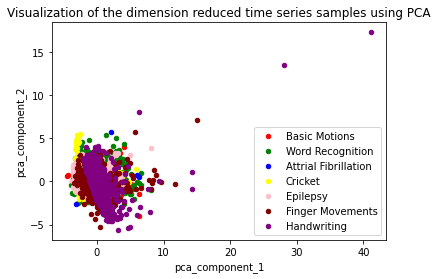

In [ ]:
# Plot the PCA projections of each time series
plt.figure(figsize = (30, 20))
ax = df_dataset.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='red')
df_dataset2.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='green', ax=ax)
df_dataset3.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='blue', ax=ax)
df_dataset4.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='yellow', ax=ax)
df_dataset5.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='pink', ax=ax)
df_dataset6.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='maroon', ax=ax)
df_dataset7.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='purple', ax=ax)

plt.title('Visualization of the dimension reduced time series samples using PCA')
plt.legend(['Basic Motions', 'Word Recognition', 'Attrial Fibrillation', 'Cricket', 'Epilepsy', 'Finger Movements', 'Handwriting'])
plt.show()

In [ ]:
fig, ax =plt.subplots(1, 7, figsize = (28, 4))
df_dataset.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='red', ax=ax[0], title='Basic Motions')
df_dataset2.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='green', ax=ax[1], title='Word Recognition')
df_dataset3.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='blue', ax=ax[2], title='Attrial Fabrillation')
df_dataset4.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='yellow', ax=ax[3], title='Cricket')
df_dataset5.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='pink', ax=ax[4], title='Epilepsy')
df_dataset6.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='maroon', ax=ax[5], title='Finger Movements')
df_dataset7.plot(x='pca_component_1', y='pca_component_2', kind='scatter', color='purple', ax=ax[6], title='Handwriting')
plt.show()

NameError: ignored

<Figure size 2160x1440 with 0 Axes>

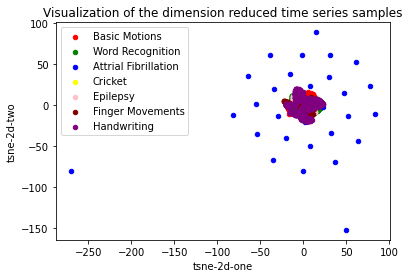

In [ ]:
# Plot TSNE of each time series
plt.figure(figsize = (30,20))
ax = df_dataset.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='red')
df_dataset2.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='green', ax=ax)
df_dataset3.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='blue', ax=ax)
df_dataset4.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='yellow', ax=ax)
df_dataset5.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='pink', ax=ax)
df_dataset6.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='maroon', ax=ax)
df_dataset7.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='purple', ax=ax)

plt.title('Visualization of the dimension reduced time series samples')
plt.legend(['Basic Motions', 'Word Recognition', 'Attrial Fibrillation', 'Cricket', 'Epilepsy', 'Finger Movements', 'Handwriting'])
plt.show()

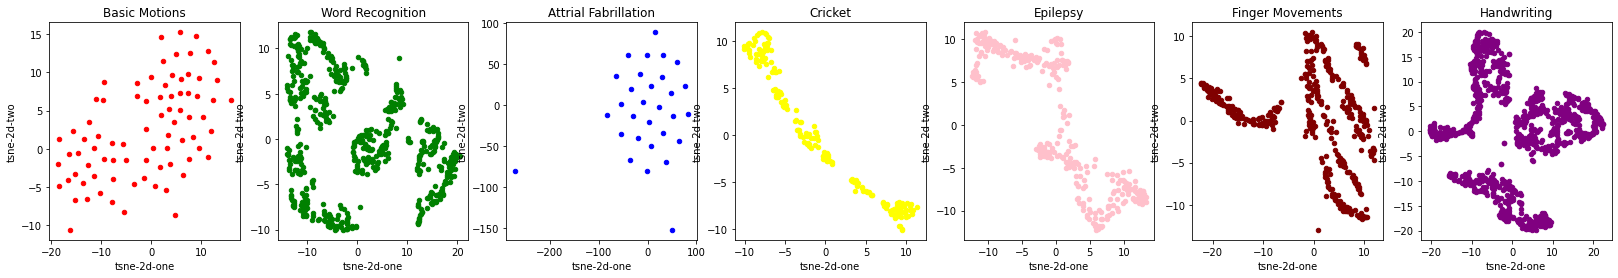

In [ ]:
fig, ax =plt.subplots(1, 7, figsize = (28, 4))
df_dataset.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='red', ax=ax[0], title='Basic Motions')
df_dataset2.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='green', ax=ax[1], title='Word Recognition')
df_dataset3.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='blue', ax=ax[2], title='Attrial Fabrillation')
df_dataset4.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='yellow', ax=ax[3], title='Cricket')
df_dataset5.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='pink', ax=ax[4], title='Epilepsy')
df_dataset6.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='maroon', ax=ax[5], title='Finger Movements')
df_dataset7.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='purple', ax=ax[6], title='Handwriting')
plt.show()

<Figure size 2160x1440 with 0 Axes>

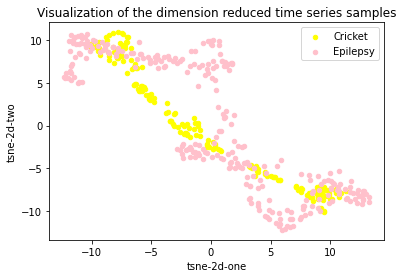

In [ ]:
# Plot TSNE of each time series
plt.figure(figsize = (30,20))
#ax = df_dataset.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='red')
#ax = df_dataset2.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='green')
#df_dataset3.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='blue', ax=ax)
ax = df_dataset4.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='yellow')
df_dataset5.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='pink', ax=ax)
#df_dataset6.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='maroon', ax=ax)
#df_dataset7.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='purple', ax=ax)

plt.title('Visualization of the dimension reduced time series samples')
plt.legend(['Cricket', 'Epilepsy'])
plt.show()

<Figure size 2160x1440 with 0 Axes>

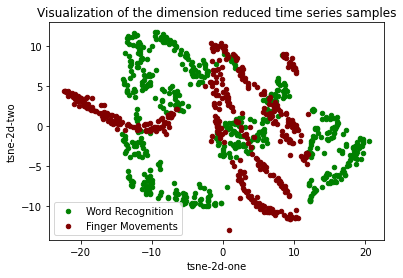

In [ ]:
# Plot TSNE of each time series
plt.figure(figsize = (30,20))
#ax = df_dataset.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='red')
ax = df_dataset2.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='green')
#df_dataset3.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='blue', ax=ax)
#df_dataset4.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='yellow', ax=ax)
#df_dataset5.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='pink', ax=ax)
df_dataset6.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='maroon', ax=ax)
#df_dataset7.plot(x='tsne-2d-one', y='tsne-2d-two', kind='scatter', color='purple', ax=ax)

plt.title('Visualization of the dimension reduced time series samples')
plt.legend(['Word Recognition', 'Finger Movements'])
plt.show()

In [ ]:
df = pd.DataFrame(entropy, columns = ['Dataset' , 'Entropy'])
df

,Dataset,Entropy
0,Basic Motions,0.744123
1,Word Recognition,0.521606
2,Atrial Fibrillation,0.732757
3,Cricket,0.516064
4,Epilepsy,0.525518
5,Finger Movements,0.581074
6,Handwriting,0.687698
